# Session 2: Assignment

How accurate is k-nearest neighbors? We can answer this question with an experiment. Let's split the dataset into two: what we will call a "training set" and a "test set". For each point in the test set, we will find the closest point from the training set, and copy its label as our prediction for the test point. We will then compare our predictions to the actual labels in the test set, and measure our accuracy.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data, labels = iris.data[:,0:2], iris.target

num_samples = len(labels)  # size of our dataset

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

In [23]:
# how many samples to keep in the training set
n_train = 100

# split our dataset into training and test sets
train_data, train_labels = data[:n_train, 0:2], labels[:n_train]
test_data, test_labels = data[n_train:, 0:2], labels[n_train:]

Let's plot the reduced training set.

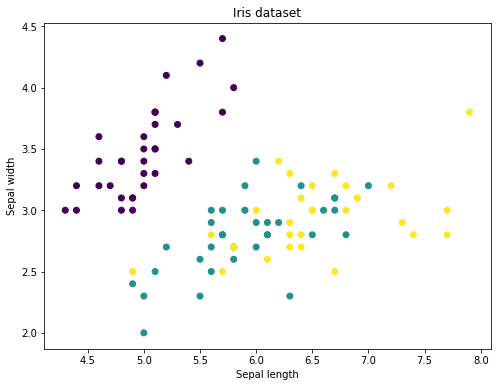

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

Now let's plot the unknown points on top of it. They are colored black.

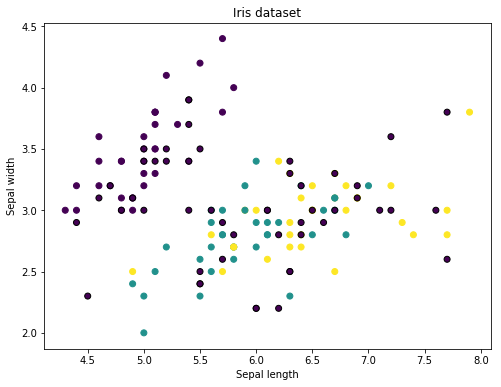

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.scatter(test_data[:,0], test_data[:,1], c=[0]*len(test_labels), cmap=None, edgecolor='k')

Let's repeat our procedure from above, where we calculate the distances between each test point and each training point.

In [28]:
# list of each set of distances between each point in the test set and each point in the training set
distances = [ np.sum((train_data[:,0:2] - [x[0],x[1]])**2, axis=1) for x in test_data ]

# for each point in the test set, take the index in the training set of the point closest to it
closest_points = [ np.argmin(distance) for distance in distances ]

# copy the labels of those closest points as our prediction
new_labels = [train_labels[c] for c in closest_points]

How did we do?

In [29]:
results = (new_labels == test_labels)
num_correct = sum(results)
accuracy = num_correct / len(results)
print("accuracy %0.2f" % accuracy)

accuracy 0.78


Our accuracy is 78%. Not too bad for such a simple method. It will sometimes be lower, between 60 and 80% depending on the luck of the training and test split. 